In [1]:
%matplotlib notebook

In [2]:
# import
from owcsimpy.geoobjects.models.typicalsimpleofficeenv_py import TypicalSimpleOfficeEnv_py as TypicalOfficeEnv
from owcsimpy.cir.freqdomaincir import FreqDomainCIR
from owcsimpy.cir.timedomaincir import TimeDomainCIR
from owcsimpy.cir.spheremodelcir import SphereModelCIR
from scipy.constants import speed_of_light
from owcsimpy.cir.cirutils import calcCIRFreqDom_fromMtx
import numpy as np

import matplotlib.pyplot as plt

import mpl_toolkits.mplot3d.art3d as art3d

from JSAnimation.IPython_display import display_animation
from matplotlib import animation

# from owcsimpy.geoutils.mobility.randommobility_py import random_waypoint as RandomWaypoint
from owcsimpy.geoutils.mobility.randommobility_py import RandomWaypoint,TruncatedLevyWalk,RandomDirection

from owcsimpy.geoutils.mobility.randomorientation_py import RandOrientationArdimas as RandomOrientation

from owcsimpy.misc import flatten

roomLength,roomWidth,roomHeight=4,3,3

In [25]:
# rwp = RandomWaypoint(1, dimensions=(roomLength, roomWidth), velocity=(0.1, 0.3), wt_max=1.0)
rwp = RandomDirection(1, dimensions=(roomLength, roomWidth), velocity=(0.1, 0.5), wt_max=1.0)
# rwp = TruncatedLevyWalk(1, dimensions=(roomLength, roomWidth), WT_MAX=1.0)
rwpIter = iter(rwp)

arrayLoc = []
arrayVel = []

i = 0
while True:
    loc = next(rwpIter)
    
    if np.linalg.norm(loc) < 1.8:
#     if i == 1000:
        break
    else:
#         arrayLoc = np.append(arrayLoc,loc)
        arrayLoc.append(np.array(loc))
        arrayVel.append(np.array(rwp.velocity))
        
    i = i+1



arrayTime = [0]
for i in range(len(arrayLoc)-1):
    if arrayVel[i] == 0:
        deltaTime = 0
    else:
        deltaTime = np.linalg.norm(arrayLoc[i+1]-arrayLoc[i])/arrayVel[i]
        
    arrayTime.append(arrayTime[i]+deltaTime)

arrayTime = np.array(list(flatten(arrayTime)))
arrayLoc = np.array(list(flatten(arrayLoc))).reshape((-1,2))
print(arrayLoc.shape)

(50, 2)


In [26]:
def getAngle(vector):
    vector = list(vector)
    
    return np.arctan2(vector[1],vector[0])

def getDirection(vector0,vector1):
    vector = vector1-vector0
    
    return getAngle(vector)

arrayDir = []
for i in range(arrayLoc.shape[0]-1):
    arrayDir.append(getDirection(arrayLoc[i],arrayLoc[i+1]))

arrayDir.append(arrayDir[-1])
arrayDir = np.array(arrayDir)

ro = RandomOrientation('walking')
arrayTheta0,arrayOmega0 = ro.genSamples(arrayTime)

# arrayOmega0 = np.zeros(arrayOmega0.shape)
# arrayTheta0 = np.zeros(arrayTheta0.shape)

In [27]:
np.average(np.diff(arrayTime))

0.9642967031963503

<IPython.core.display.Javascript object>


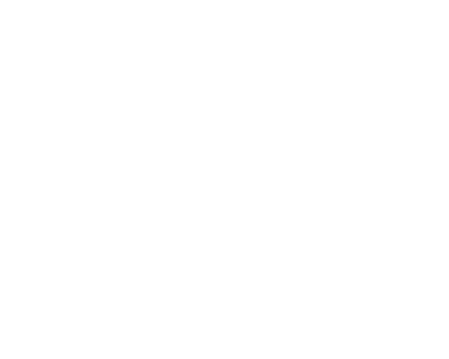


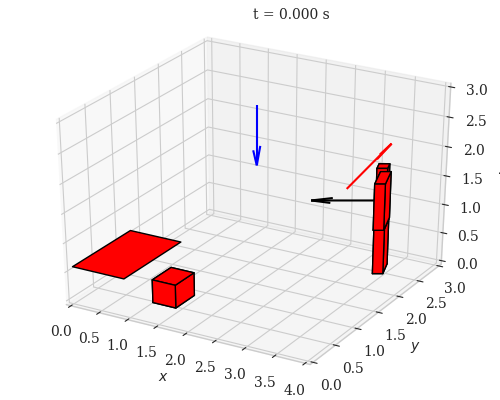
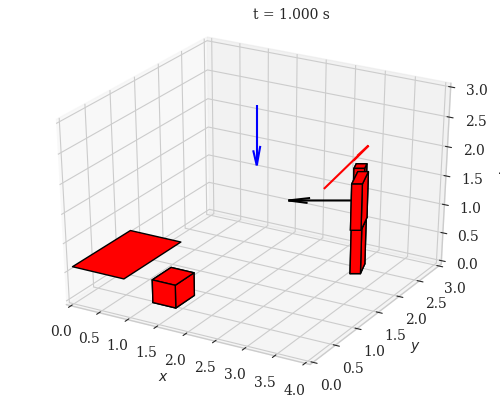
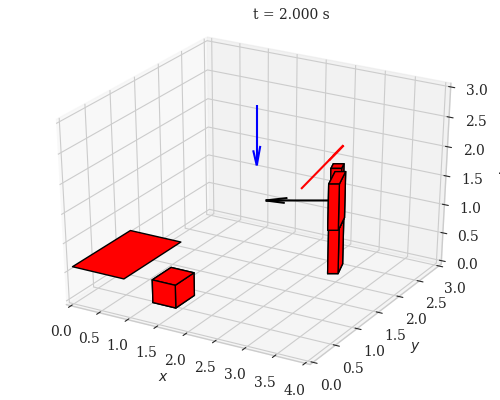
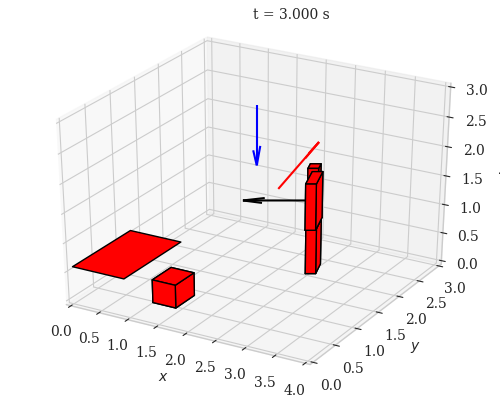
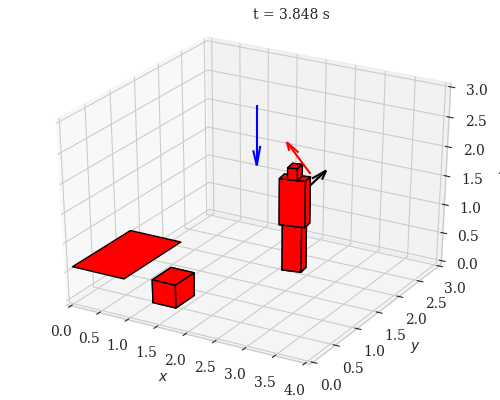
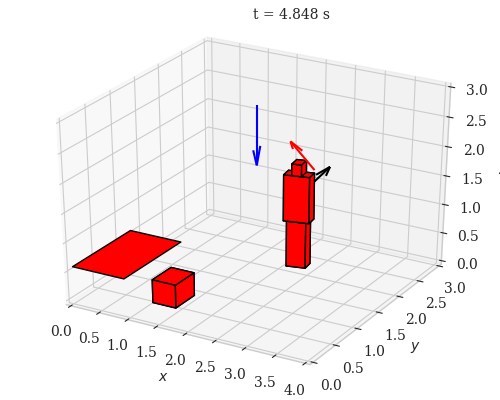
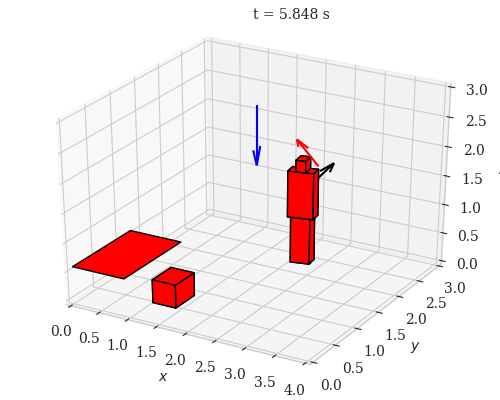
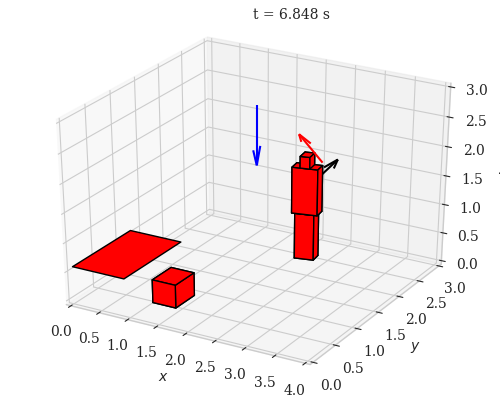
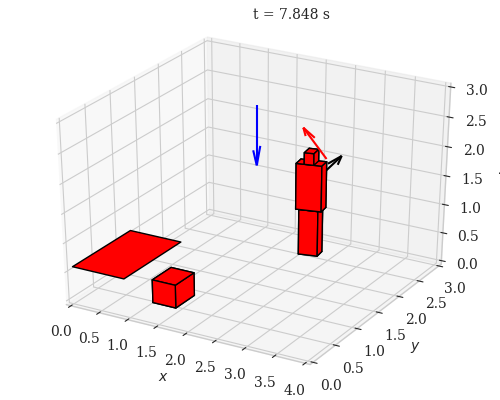
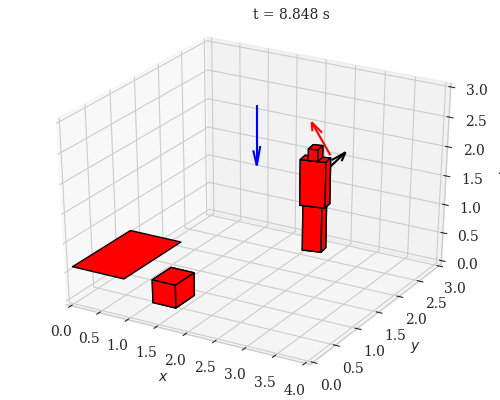
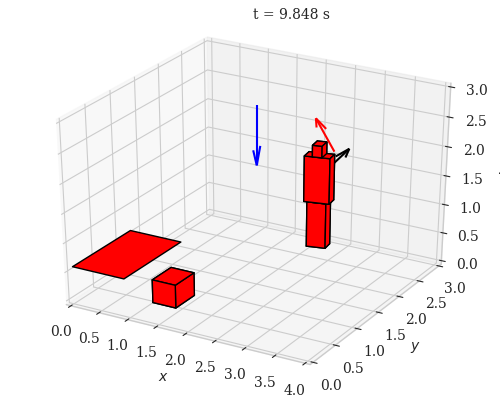
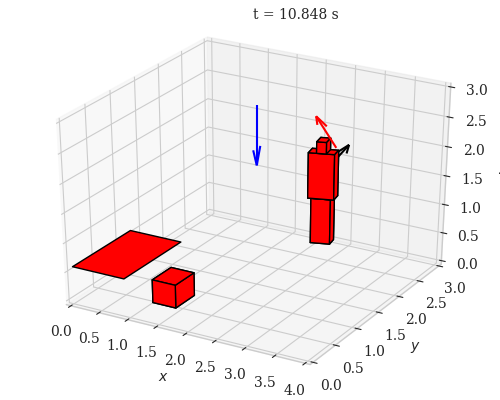
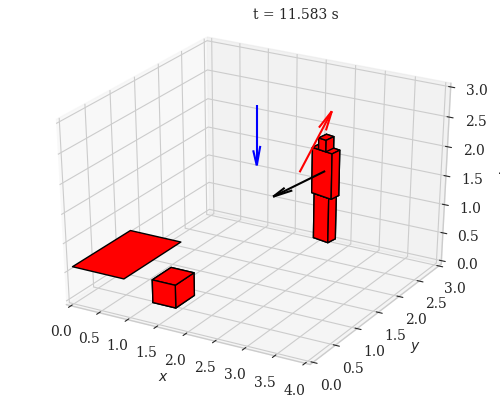
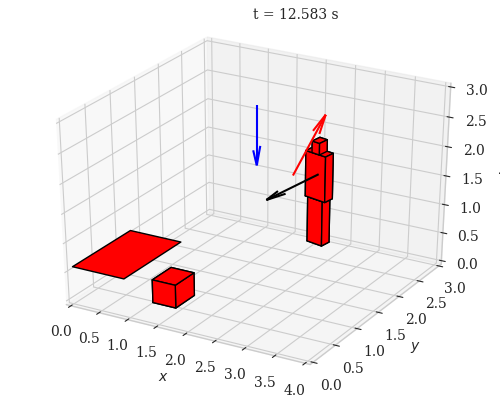
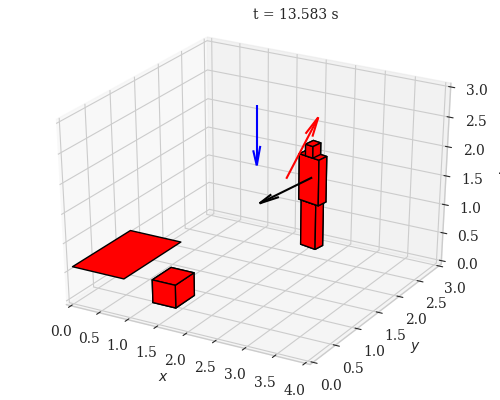
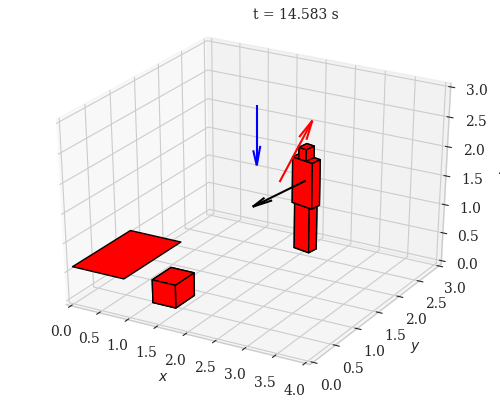
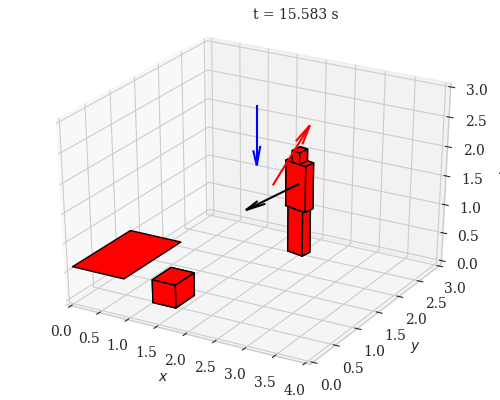
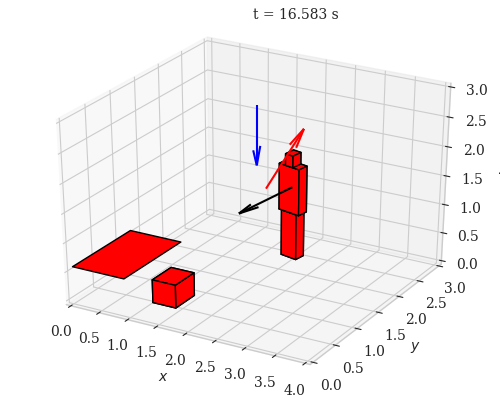
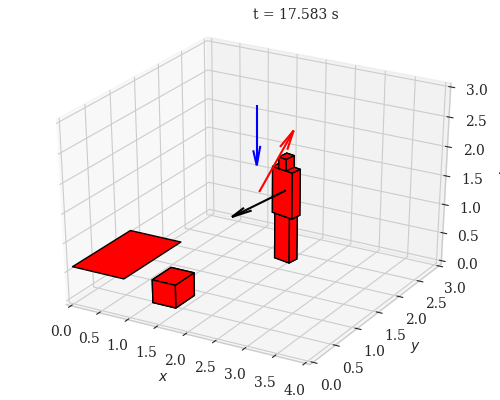
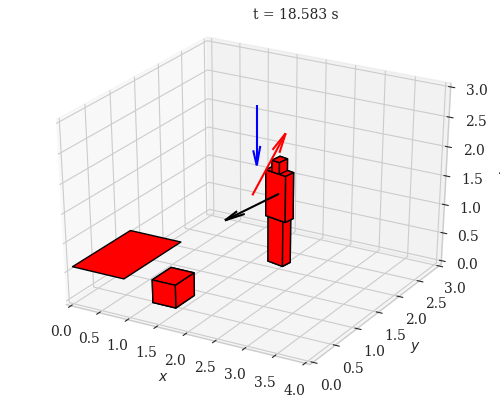
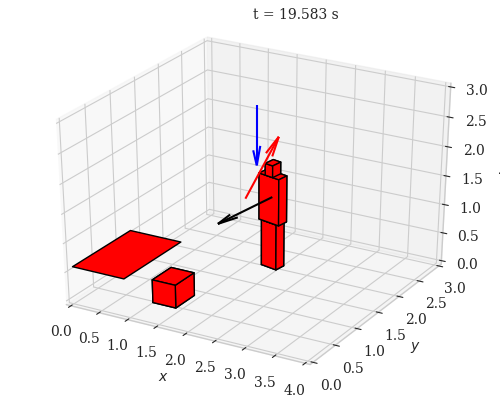
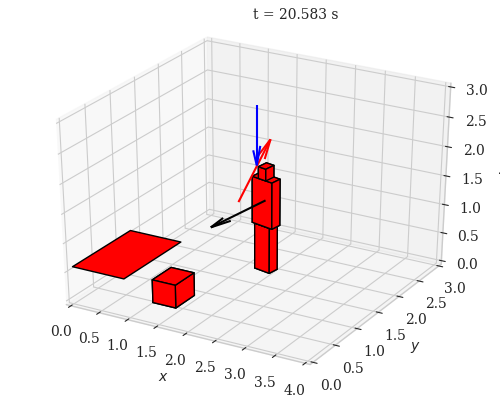
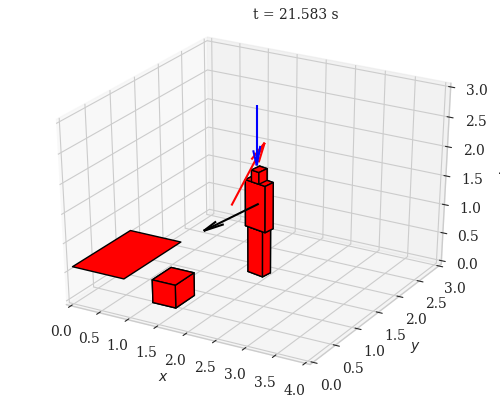
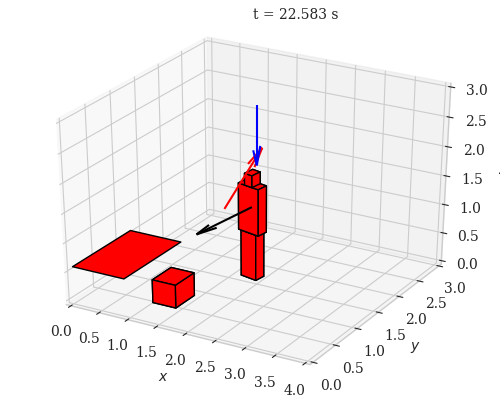
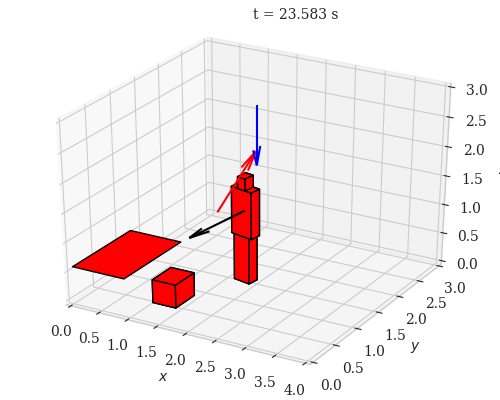
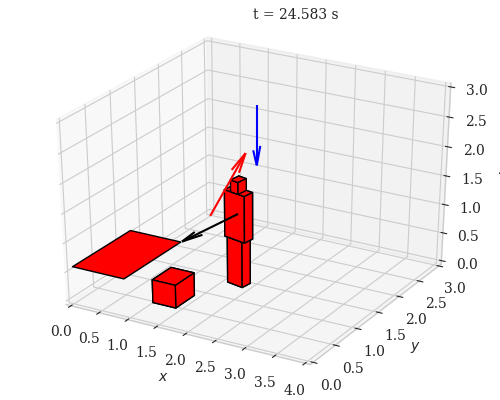
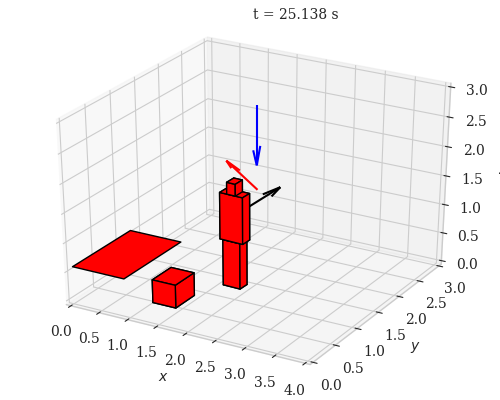
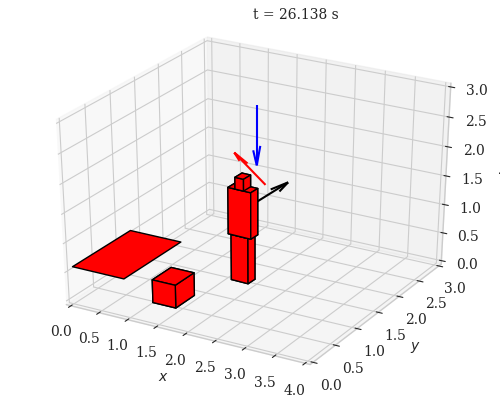
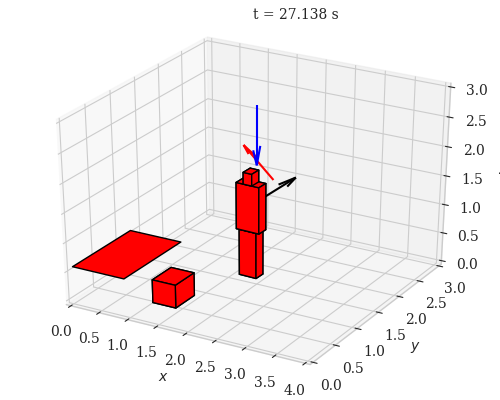
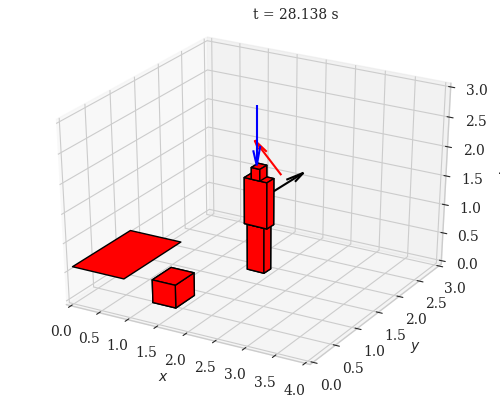
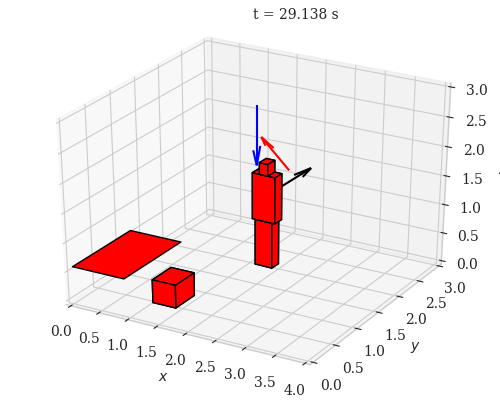
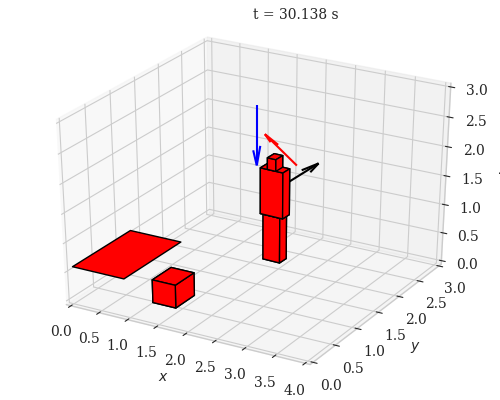
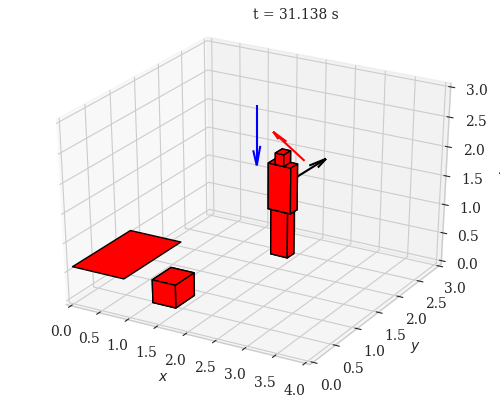
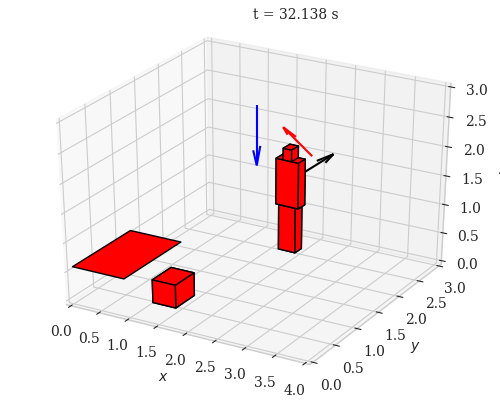
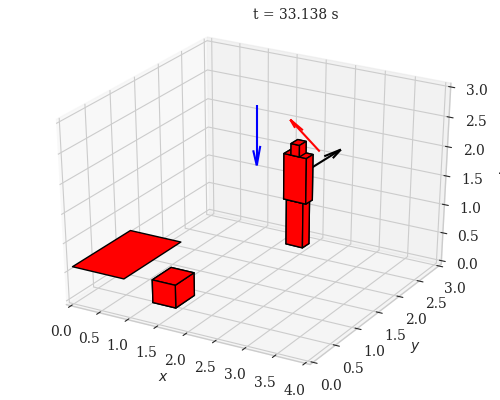
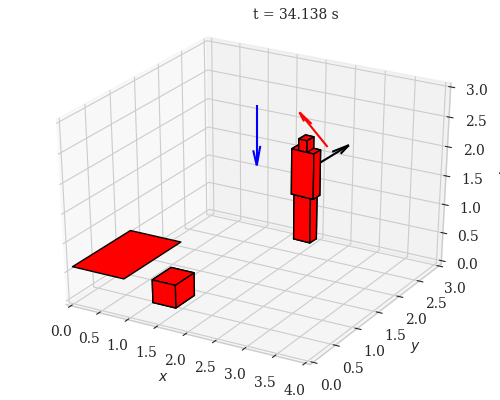
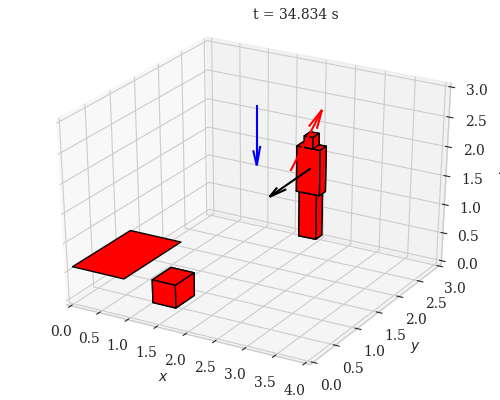
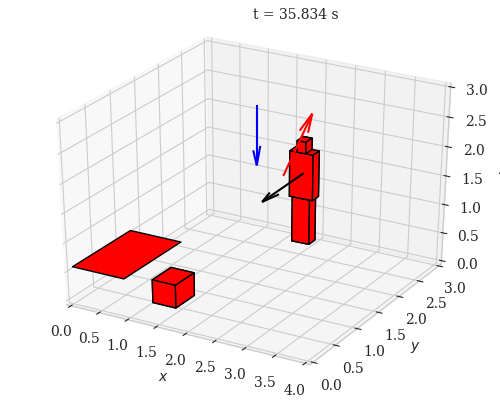
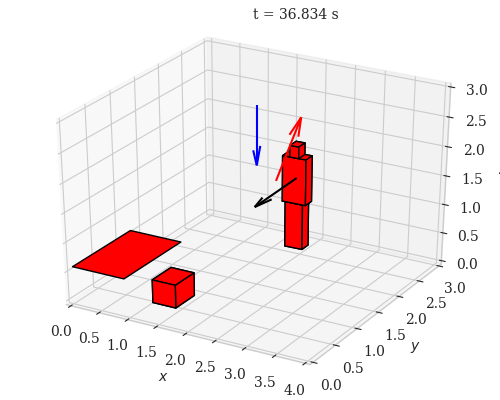
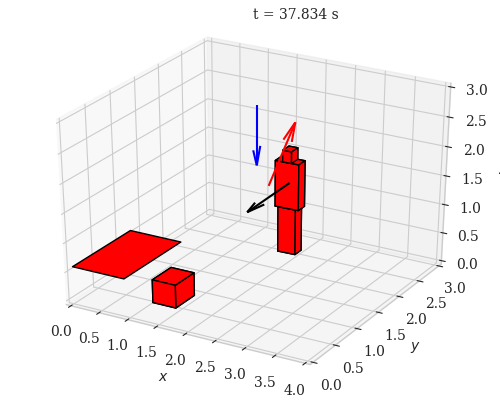
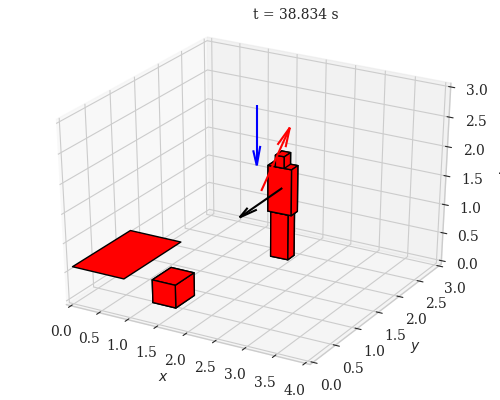
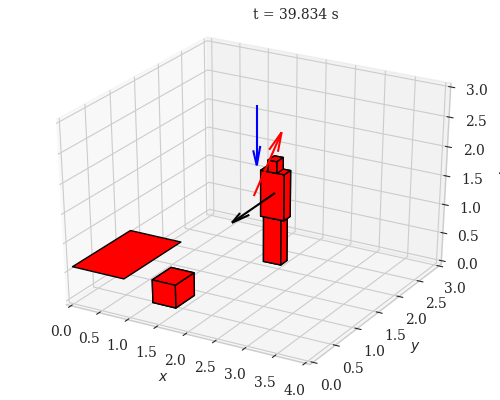
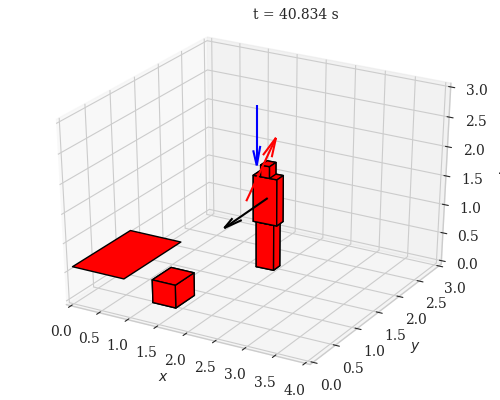
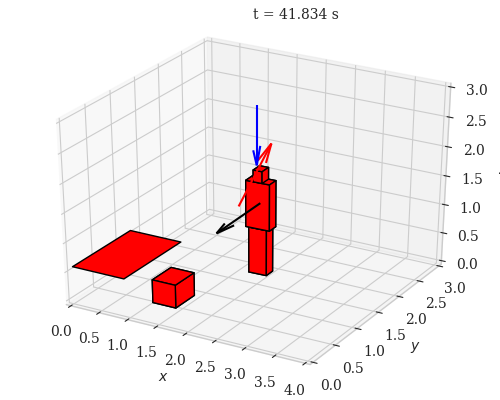
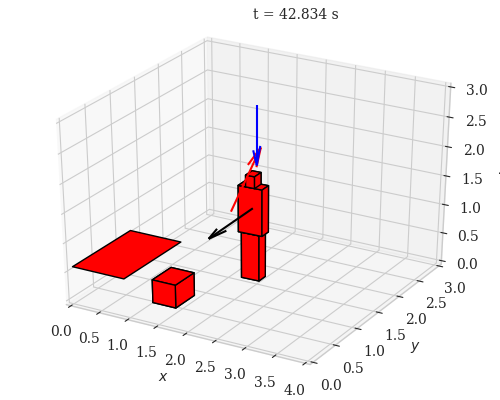
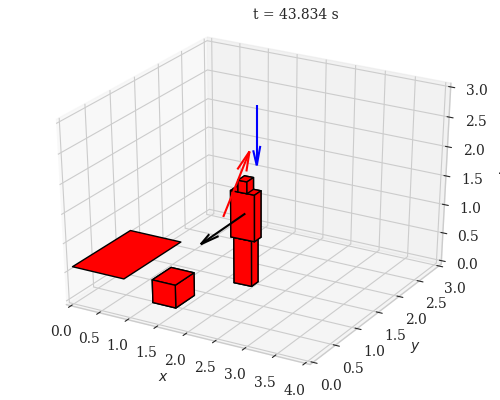
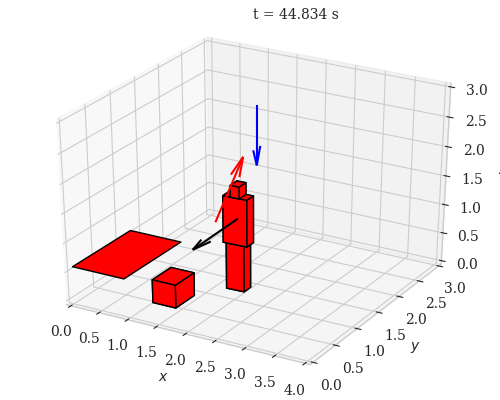
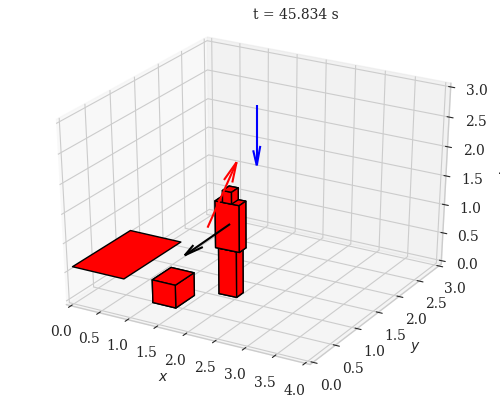
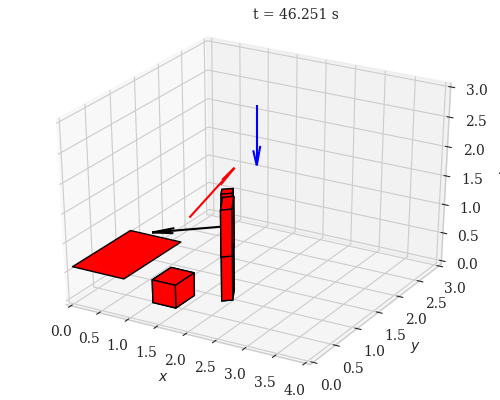
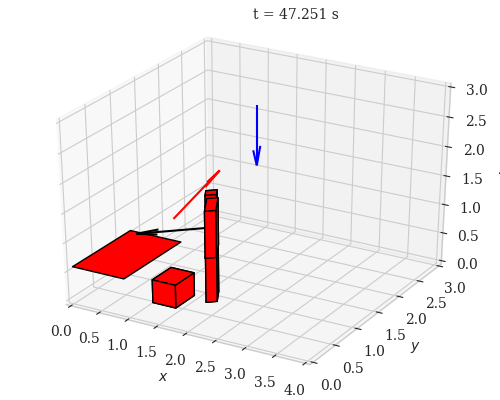

In [28]:
# Case 1
position, furnitureConfig, humanLoc, humanDirection, activity = \
    'standing','cornerYFacingWall',[0,0],np.deg2rad(0),'reading'

office1 = TypicalOfficeEnv(
    roomDim=[roomLength,roomWidth,roomHeight],
    humanLoc=humanLoc,humanDirection=humanDirection,
    mode='rx',
    activity=activity,
    position=position,
    furnitureConfig=furnitureConfig
)

Nframes = len(arrayLoc)

# arrayDir = np.zeros((Nframes,))
arrayPolar = np.linspace(0,np.pi/4,Nframes)

# fig,ax,anim = office1.getAnimation(arrayLoc,arrayDir,arrayTheta0,arrayOmega0,arrayTime,interval=np.average(np.diff(arrayTime))*1000)
fig,ax,anim = office1.getAnimation(arrayLoc,arrayDir,arrayTheta0,arrayOmega0,arrayTime,interval=100)
fig.set_size_inches(5, 4)

display_animation(anim, default_mode='once')


In [29]:
anim.save('basic_animation.gif',  writer='imagemagick')

In [7]:
fig.set_size_inches(18.5, 10.5)

<IPython.core.display.Javascript object>


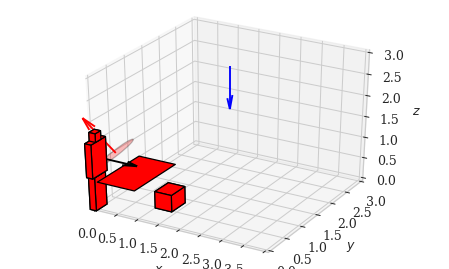

3.141592653589793


In [32]:
# Case 1
position, furnitureConfig, humanLoc, humanDirection, activity = \
    'standing','cornerYFacingWall',[0,0],np.deg2rad(0),'reading'

office1 = TypicalOfficeEnv(
    roomDim=[roomLength,roomWidth,roomHeight],
    humanLoc=humanLoc,humanDirection=humanDirection,
    mode='rx',
    activity=activity,
    position=position,
    furnitureConfig=furnitureConfig
)

office1.draw()

print(office1.human.pd.azimuth)

<IPython.core.display.Javascript object>


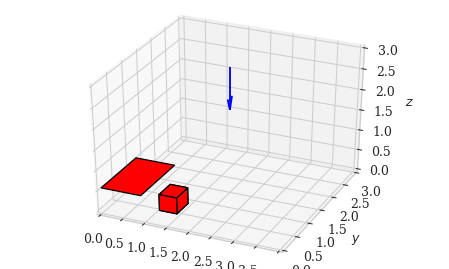

In [5]:
# Case 1
position, furnitureConfig, humanLoc, humanDirection, activity = \
    'standing','cornerYFacingWall',[0,0],np.deg2rad(0),'calling'

office1 = TypicalOfficeEnv(
    roomDim=[roomLength,roomWidth,roomHeight],
    humanLoc=humanLoc,humanDirection=humanDirection,
    mode='rx',
    activity=activity,
    position=position,
    furnitureConfig=furnitureConfig
)


fig,ax = office1.drawToAnimation();

# colls = []

# for plane in office1.human.head.listPlanes:
#     verts = [list(map(lambda vert: (vert[0],vert[1],vert[2]), 
#             plane.verts))]
#     col = art3d.Poly3DCollection(verts,edgecolor='k',facecolor='r')
#     colls.append(ax.add_collection3d(col))

# for plane in office1.human.body.listPlanes:
#     verts = [list(map(lambda vert: (vert[0],vert[1],vert[2]), 
#             plane.verts))]
#     col = art3d.Poly3DCollection(verts,edgecolor='k',facecolor='r')
#     colls.append(ax.add_collection3d(col))
    
# for plane in office1.human.leg.listPlanes:
#     verts = [list(map(lambda vert: (vert[0],vert[1],vert[2]), 
#             plane.verts))]
#     col = art3d.Poly3DCollection(verts,edgecolor='k',facecolor='r')
#     colls.append(ax.add_collection3d(col))
    
# arrow_dir = ax.get_arrow(office1.human.ctrPoint,office1.human.normalVect,color='black')
# colls.append(ax.add_collection(arrow_dir))

# arrow_pd = ax.get_arrow(office1.human.pd.ctrPoint,office1.human.pd.normalVect,color='red')
# colls.append(ax.add_collection(arrow_pd))

# Nframes = 60

# locx = np.linspace(0,2,Nframes)
# polarx = np.linspace(0,np.pi/4,Nframes)

# def animate(i,office1):
    
#     office1.updateHuman([locx[i],0],humanDirection,'rx',activity,position,polarx[i])
    
#     offset = 0;
#     for j,plane in enumerate(office1.human.head.listPlanes):
#         verts = [list(map(lambda vert: (vert[0],vert[1],vert[2]), 
#                 plane.verts))]
#         colls[offset+j].set_verts(verts)
    
#     offset = 6;
#     for j,plane in enumerate(office1.human.body.listPlanes):
#         verts = [list(map(lambda vert: (vert[0],vert[1],vert[2]), 
#                 plane.verts))]
#         colls[offset+j].set_verts(verts)
    
#     offset = 12;
#     for j,plane in enumerate(office1.human.leg.listPlanes):
#         verts = [list(map(lambda vert: (vert[0],vert[1],vert[2]), 
#                 plane.verts))]
#         colls[offset+j].set_verts(verts)
    
#     arrow = ax.get_arrow(office1.human.ctrPoint,office1.human.normalVect)
#     colls[18].set_segments([arrow._segments3d[k,:,:] for k in range(3)])
    
#     arrow = ax.get_arrow(office1.human.pd.ctrPoint,office1.human.pd.normalVect)
#     colls[19].set_segments([arrow._segments3d[k,:,:] for k in range(3)])
    
#     return colls

# anim = animation.FuncAnimation(fig, animate, fargs=(office1,), frames=Nframes, interval=50)

# display_animation(anim, default_mode='once')

<IPython.core.display.Javascript object>


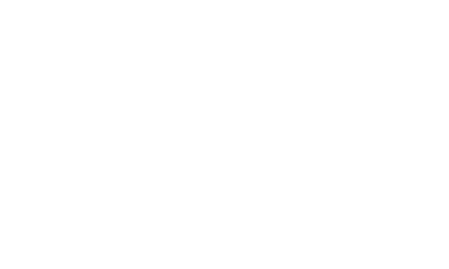


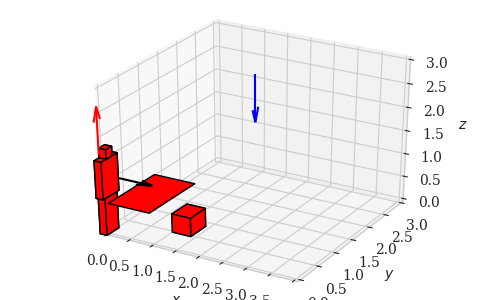
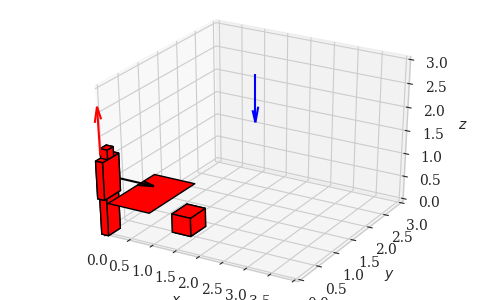
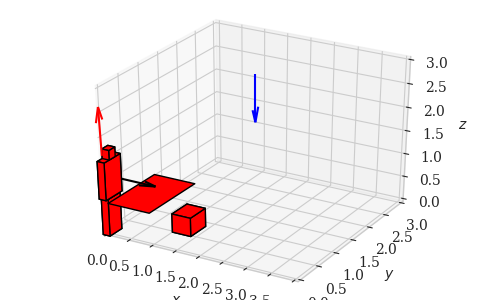
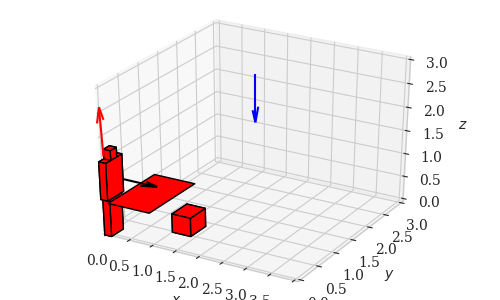
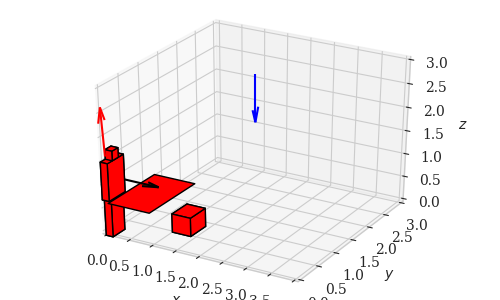
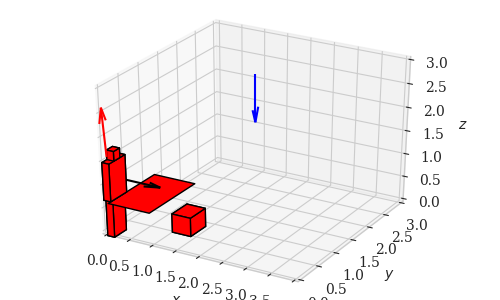
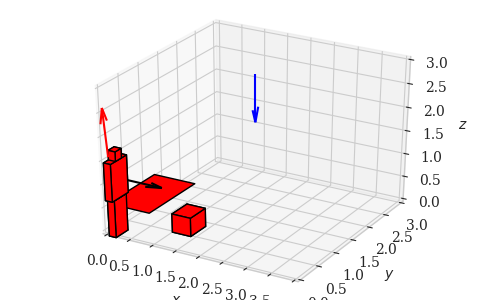
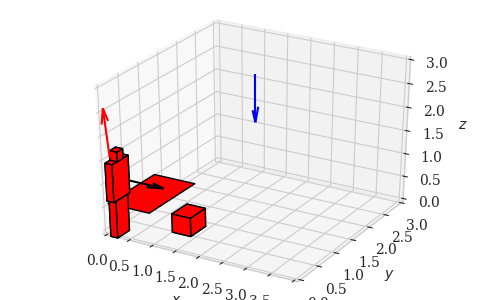
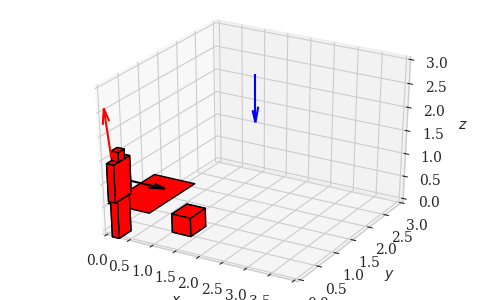
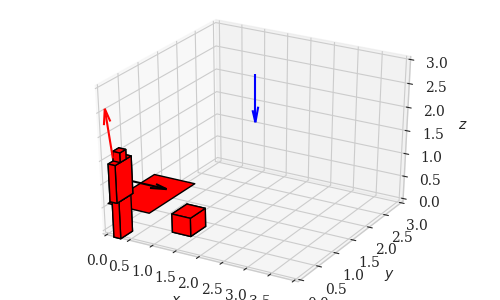
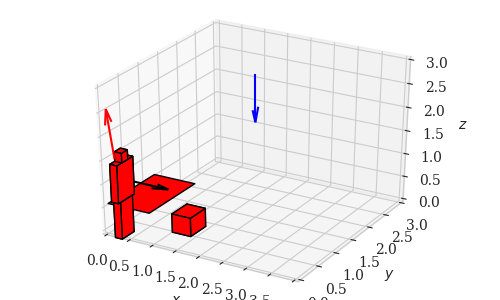
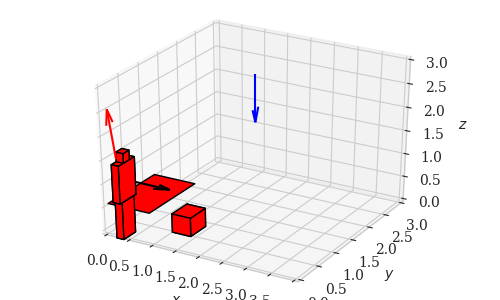
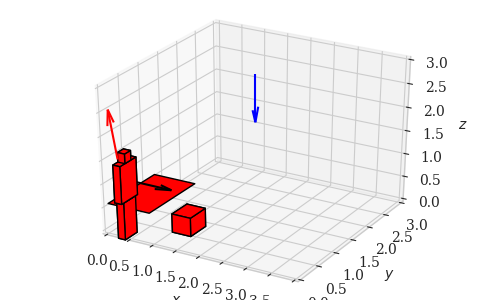
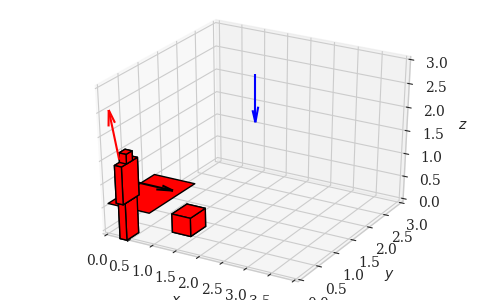
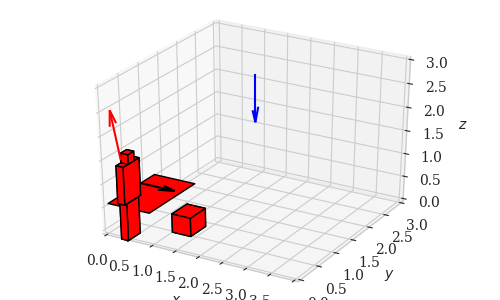
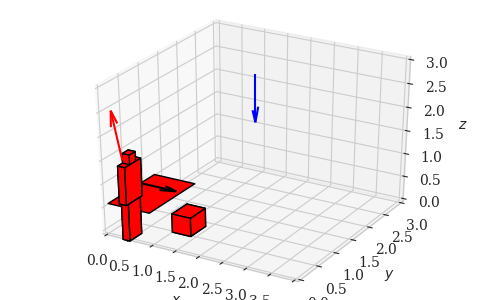
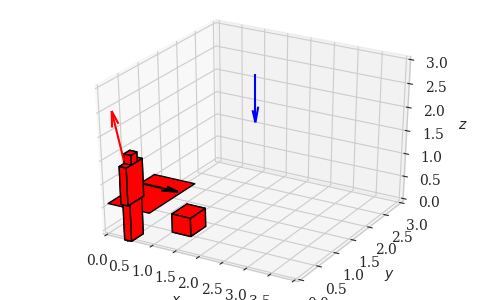
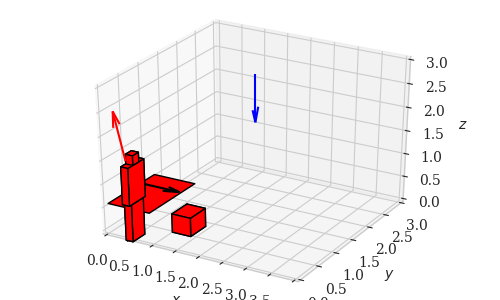
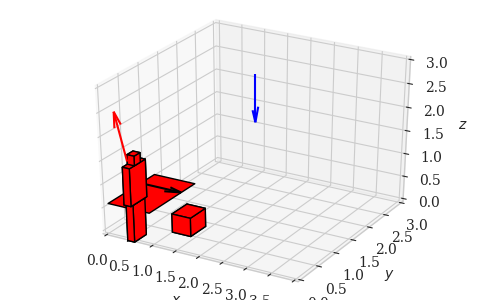
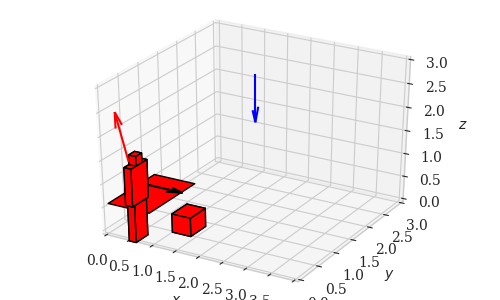
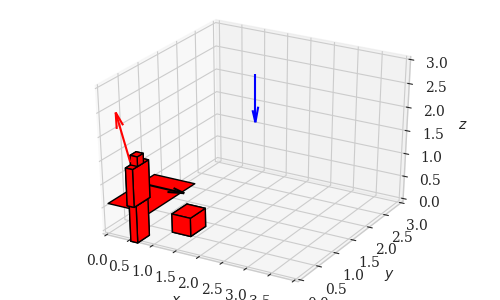
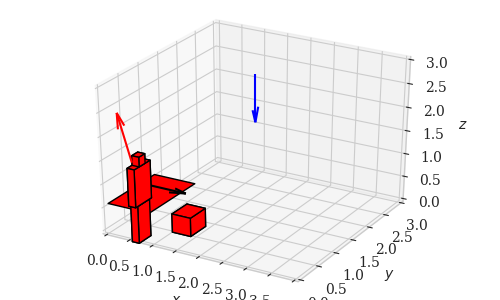
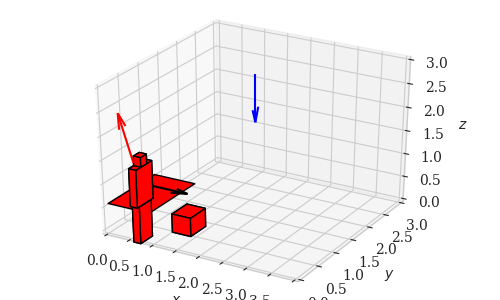
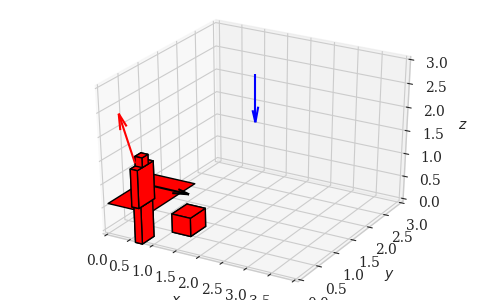
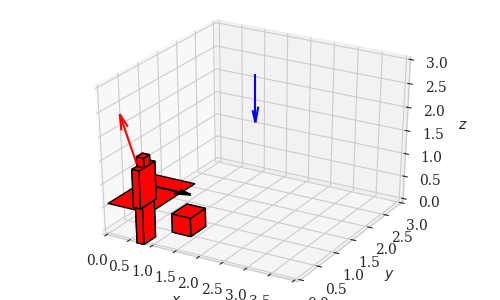
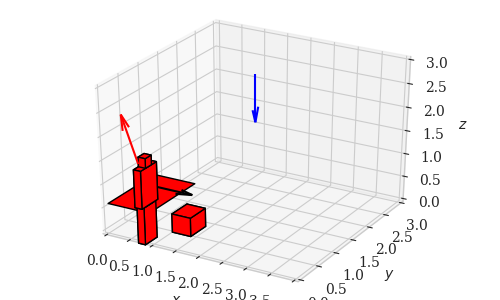
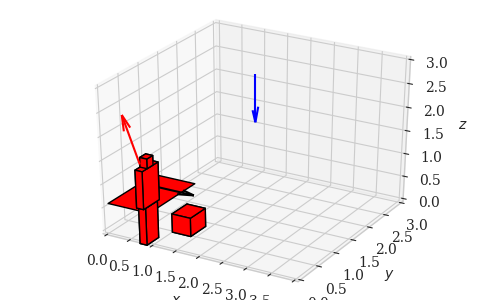
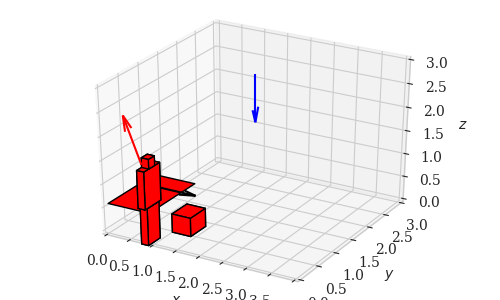
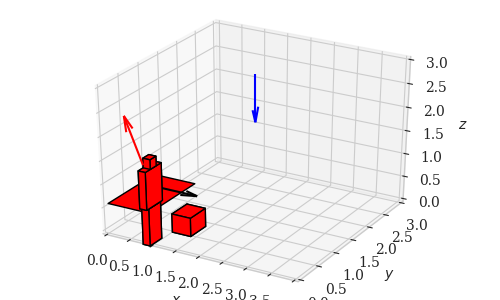
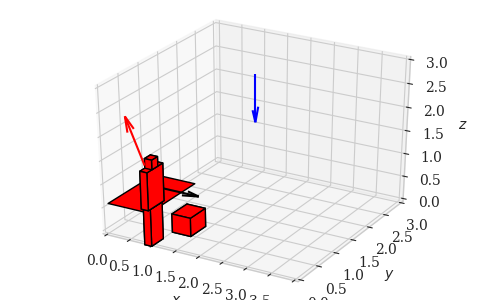
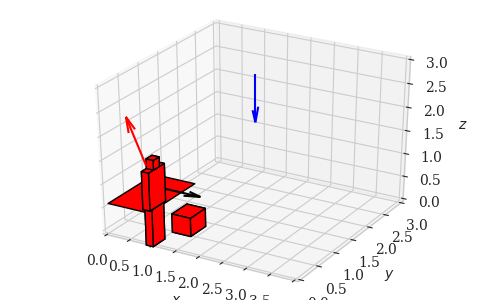
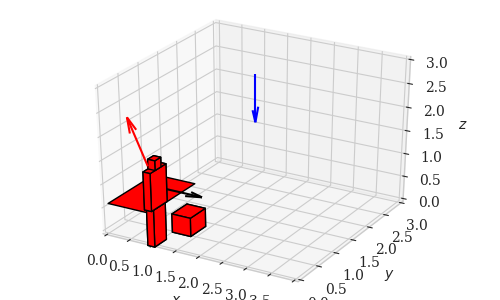
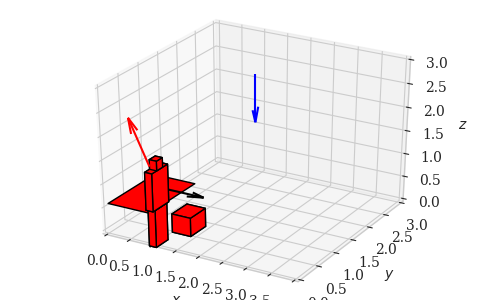
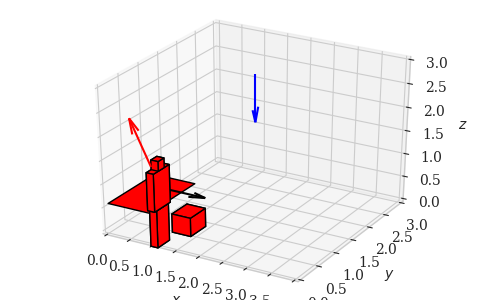
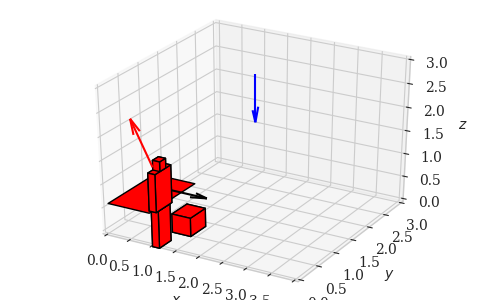
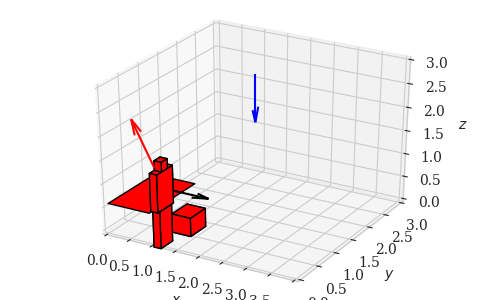
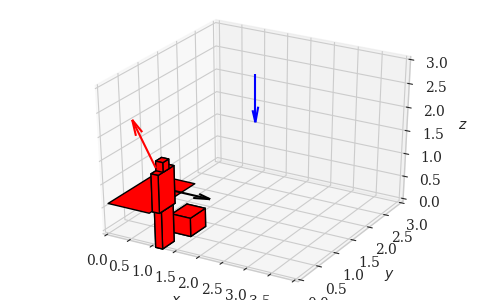
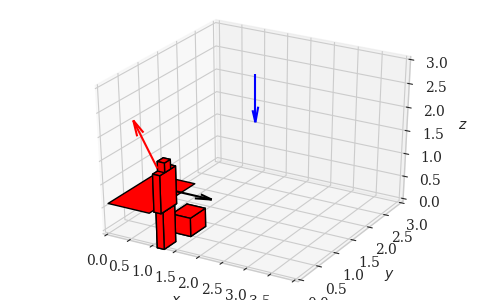
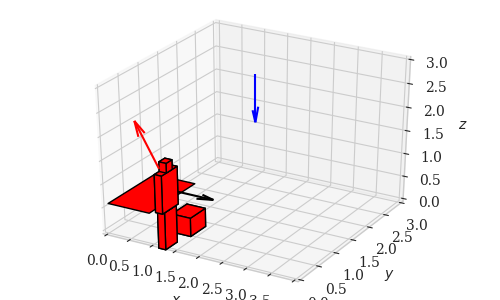
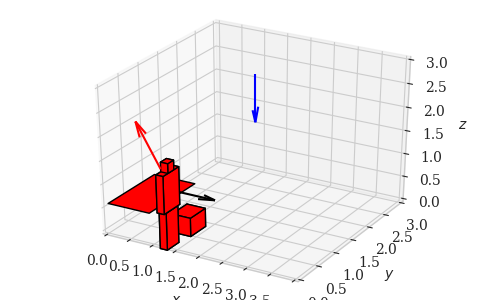
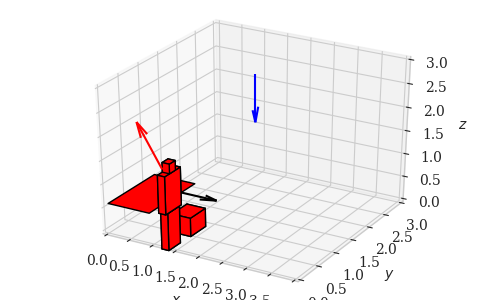
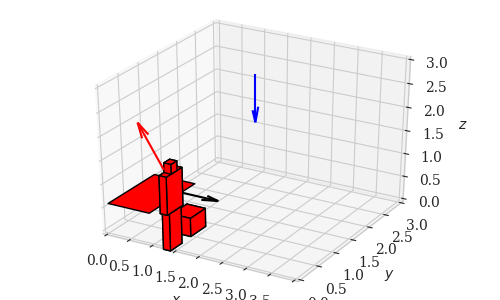
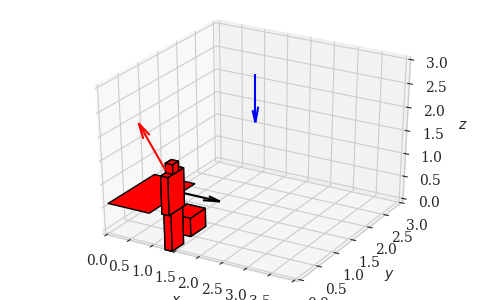
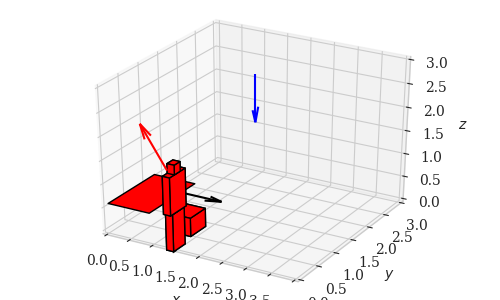
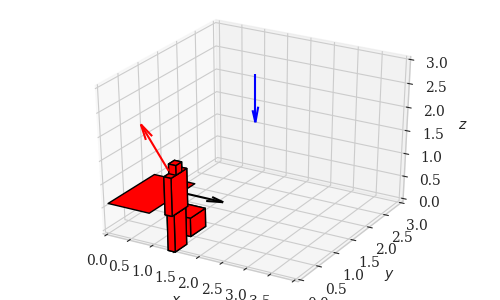
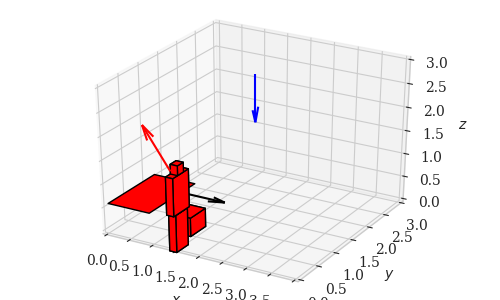
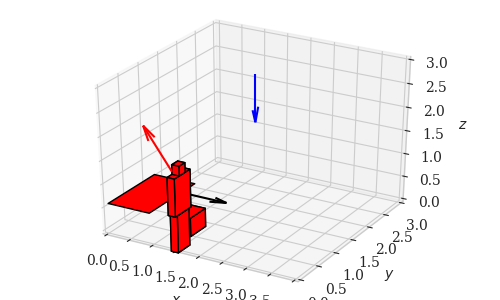
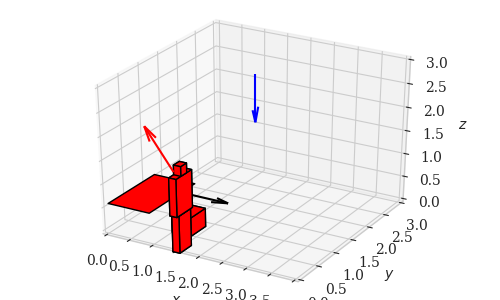
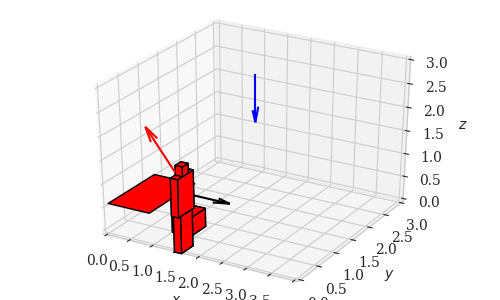
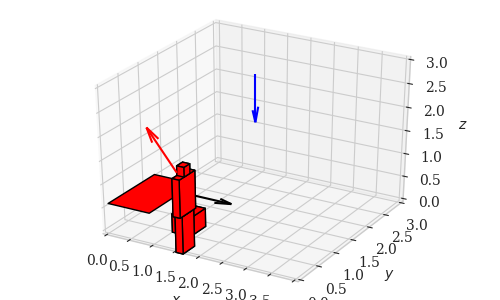
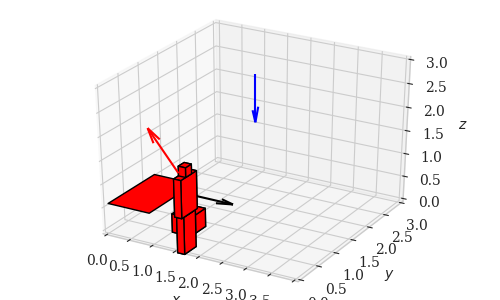
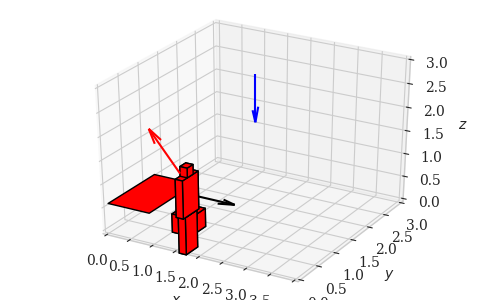
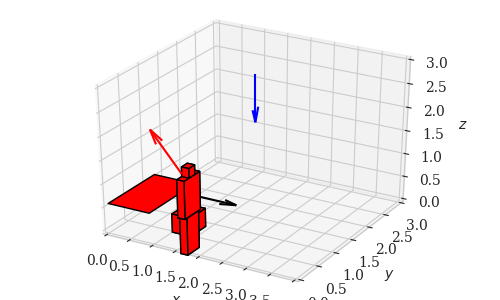
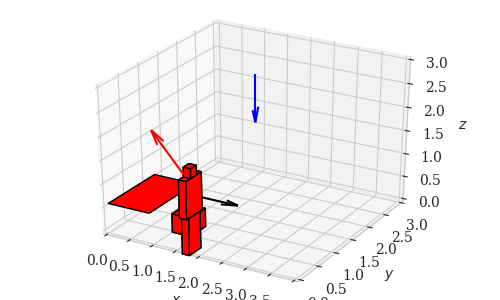
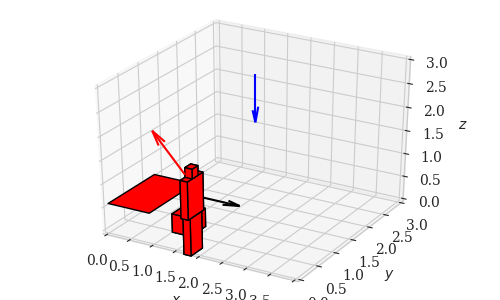
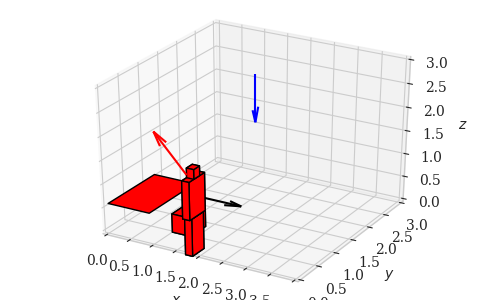
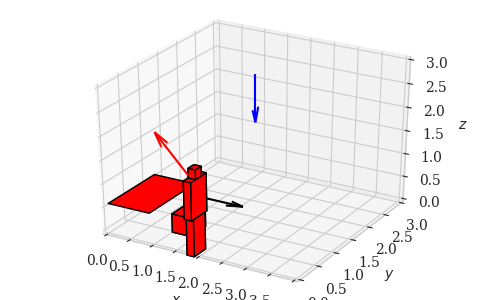
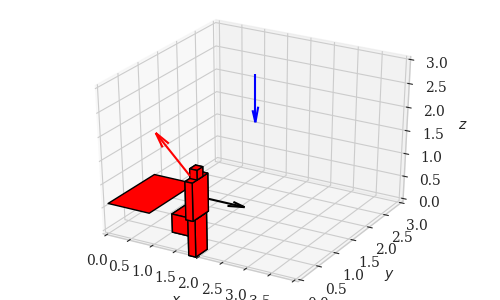
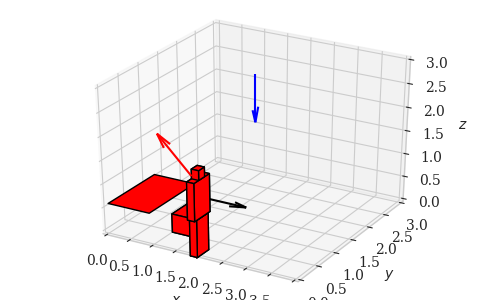
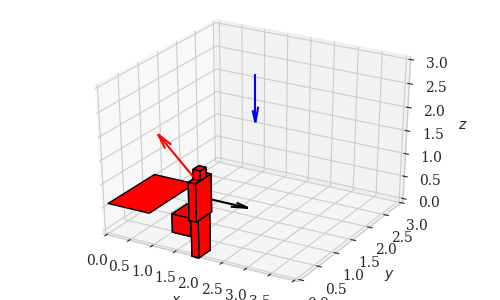

In [7]:
# Case 1
position, furnitureConfig, humanLoc, humanDirection, activity = \
    'standing','cornerYFacingWall',[0,0],np.deg2rad(0),'calling'

office1 = TypicalOfficeEnv(
    roomDim=[roomLength,roomWidth,roomHeight],
    humanLoc=humanLoc,humanDirection=humanDirection,
    mode='rx',
    activity=activity,
    position=position,
    furnitureConfig=furnitureConfig
)

Nframes = 60

arrayLoc = np.transpose([np.linspace(0,2,Nframes),np.zeros((Nframes,))])
arrayDir = np.zeros((Nframes,))
arrayPolar = np.linspace(0,np.pi/4,Nframes)

fig,ax,anim = office1.getAnimation(arrayLoc,arrayDir,arrayPolar)

display_animation(anim, default_mode='once')


In [ ]:
tmp1 = np.linspace(0,1,3)
tmp2 = np.zeros((3,))
tmp = np.transpose([tmp1,tmp2])
print(tmp[2])

In [ ]:
print(anim)

In [ ]:
tmp.shape[0]

In [ ]:
dir(office1)